<a href="https://colab.research.google.com/github/ansal1202/titanic-analysis/blob/main/2024_Task_05%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_%E6%A8%A1%E5%9E%8B%E5%84%AA%E5%8C%96%E8%88%87%E6%AF%94%E8%BC%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#載入數據
#觀察資料
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
print(display(df))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


None


In [2]:
#排除多於欄位
df_clean = df.copy()
df_clean.drop(columns=['PassengerId','Cabin'],axis=1,inplace=True)

刪除多餘的欄位
PassengerId本身無意義，可以先移除

Cabin缺失值過多，可以排除

**填補缺失值**

利用平均數填補缺失值

In [3]:
# 使用平均數填補
age_mean = df_clean.copy()
age_mean['Age'].fillna(age_mean['Age'].mean(),inplace=True)

# Comparing the results
age_fill = pd.DataFrame({
    "Original": df_clean['Age'],
    "age_mean": age_mean['Age']
})
age_fill
display(age_fill.describe())

,Original,age_mean
count,714.000000,891.000000
mean,29.699118,29.699118
std,14.526497,13.002015
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,29.699118
75%,38.000000,35.000000
max,80.000000,80.000000


**非數值型欄位處理**

In [4]:
import pandas as pd
# Sex直接轉換
df_clean['Sex'] = df_clean['Sex'].replace({'male':1,'female':0})

# Embarked使用OneHotEncoder
embark = pd.get_dummies(df_clean['Embarked'], prefix="Embarked",dtype=int)
pclass = pd.get_dummies(df_clean['Pclass'], prefix="Pclass",dtype=int)
df_clean = pd.concat([df_clean,embark],axis=1)
df_clean = pd.concat([df_clean,pclass],axis=1)
print(df_clean.head())

   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare Embarked  Embarked_C  \
0  22.0      1      0         A/5 21171   7.2500        S           0   
1  38.0      1      0          PC 17599  71.2833        C           1   
2  26.0      0      0  STON/O2. 3101282   7.9250        S           0   
3  35.0      1      0            113803  53.1000        S           0   
4  35.0      0      0            373450   8.0500        S           0   

   Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0           1   

**特徵工程**

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


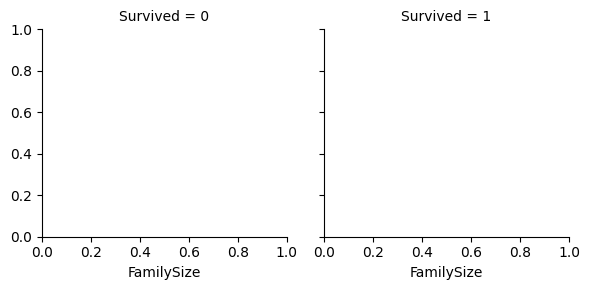

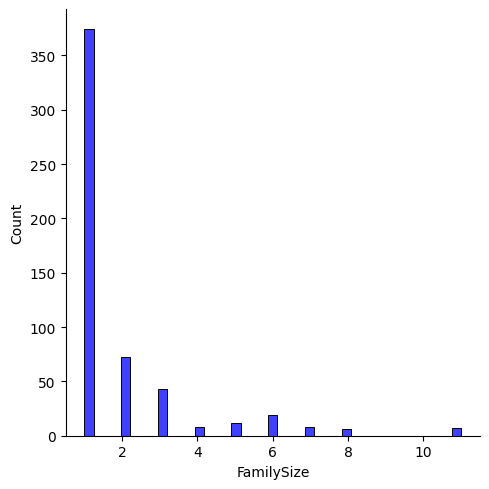

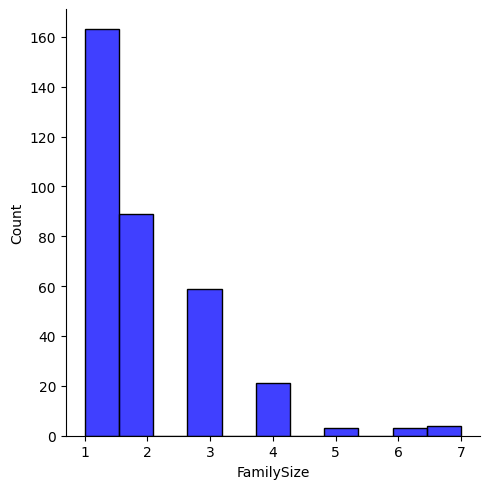

In [5]:
import seaborn as sns
#新增FamilySize欄位統整乘客在船上的親屬人數
df_clean['FamilySize'] = df_clean['SibSp']+df_clean['Parch']+1

Family = sns.FacetGrid(df_clean,col='Survived')
Family.map(sns.displot,'FamilySize',kde=False,color='blue')

In [6]:
import pandas as pd
# 定義family函數，家族人數在2~4個，定義為small;家族人數超過5個定義為large
family = df_clean.copy()

family['FamilySize'] = family['SibSp'] + family['Parch'] + 1
family['FamilySingle'] = family['FamilySize'].map(lambda s : 1 if s == 1 else 0)
family['FamilySmall']  = family['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)
family['FamilyLarge']  = family['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)

# Comparing the results
family = family.loc[:,['FamilySingle','FamilySmall','FamilyLarge']]

print(family.head())

   FamilySingle  FamilySmall  FamilyLarge
0             0            1            1
1             0            1            1
2             1            0            0
3             0            1            1
4             1            0            0


In [7]:
# 將處理過的資料合併
df_all = pd.concat([df_clean,age_fill,family],axis=1)
display(df_all.describe())
print(df_all.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Original,age_mean,FamilySingle,FamilySmall,FamilyLarge
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066,1.904602,29.699118,29.699118,0.602694,0.327722,0.327722
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665,1.613459,14.526497,13.002015,0.489615,0.469646,0.469646
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.125000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,28.000000,29.699118,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,38.000000,35.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,80.000000,80.000000,1.000000,1.000000,1.000000


   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare Embarked  ...  Embarked_S  \
0  22.0      1      0         A/5 21171   7.2500        S  ...           1   
1  38.0      1      0          PC 17599  71.2833        C  ...           0   
2  26.0      0      0  STON/O2. 3101282   7.9250        S  ...           1   
3  35.0      1      0            113803  53.1000        S  ...           1   
4  35.0      0      0            373450   8.0500        S  ...           1   

   Pclass_1  Pclass_2  Pclass_3  FamilySize  Original  a

In [8]:
# 將變數加入模型
df_model_mean  = df_all[["Survived", "Pclass", "Fare", "age_mean", "Sex", "FamilySingle", "FamilySmall", "FamilyLarge", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C"]]


In [11]:
#定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = list(set(df_model_mean.columns) - {'Survived'})
columns_y = ['Survived']

train_X = df_model_mean[columns_X]
train_y = df_model_mean[columns_y]

# Identify non-numerical columns
non_numeric_columns = train_X.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example: one-hot encoding)
train_X_encoded = pd.get_dummies(train_X, columns=non_numeric_columns)

#使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores_mean = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_mean)
print(scores_mean.mean())

[0.81564246 0.80337079 0.79213483 0.79775281 0.8258427 ]
0.8069487163392128


**小結**

通過創建特徵，我們可能可以增強模型的預測能力

**不同模型嘗試**

In [13]:
from sklearn.model_selection import train_test_split
data = df_model_mean
# 分割數據集為訓練集和測試集
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**決策樹**

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 初始化決策樹模型
decision_tree_model = DecisionTreeClassifier(random_state=10,max_depth=3)

# 訓練模型
decision_tree_model.fit(X_train, y_train)

# 在測試集上預測
y_pred = decision_tree_model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7988826815642458

**隨機森林**

In [15]:
# 導入隨機森林分類器
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林模型
random_forest_model = RandomForestClassifier(max_depth=5,n_estimators=100)

# 訓練模型
random_forest_model.fit(X_train, y_train)

# 在測試集上預測
y_pred_rf = random_forest_model.predict(X_test)

# 計算隨機森林的準確率
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8156424581005587

**XGBoost**

In [21]:
# 導入隨機森林分類器
import xgboost

# 初始化隨機森林模型
random_xgboost_model = xgboost.XGBClassifier(max_depth=2,n_estimators=50)

# 訓練模型
random_xgboost_model.fit(X_train, y_train)

# 在測試集上預測
y_pred_rf = random_xgboost_model.predict(X_test)

# 計算隨機森林的準確率
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8324022346368715

**SVM** with RBF kernel

In [27]:

# 導入SVM
from sklearn.svm import SVC

# 初始化SVM模型
svm_model = SVC(kernel="rbf", C=10,max_iter=1000)

# 擬合訓練數據
svm_model.fit(X_train, y_train)

# 在測試數據集上進行預測
y_pred = svm_model.predict(X_test)

# 計算SVM模型的準確率
accuracy_svm = accuracy_score(y_test, y_pred)
accuracy_svm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.6815642458100558

**SVM** with Linear Kernal

In [28]:
# 導入SVM和必要的庫
from sklearn import svm

# 初始化SVM模型
svm_model = svm.LinearSVC(max_iter=30000)

# 擬合訓練數據
svm_model.fit(X_train, y_train)

# 在測試數據集上進行預測
y_pred = svm_model.predict(X_test)

# 計算SVM模型的準確率
accuracy_svm = accuracy_score(y_test, y_pred)
accuracy_svm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8100558659217877